<a href="https://colab.research.google.com/github/ashish244co/Deep-Learning/blob/master/PytorchHybridLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [0]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
import torch.nn as nn

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([128, 1, 28, 28])
torch.Size([1, 28, 28])
2


In [0]:
def show_image(img):
    npimg = img.numpy()
    npimg=np.transpose(npimg, (1, 2,0))
    plt.imshow(npimg.reshape(28,28))
    plt.show()

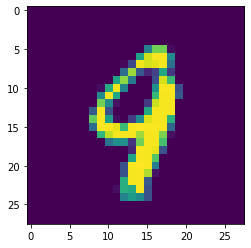

In [7]:
show_image(images[0])

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1,padding=1),     
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),  
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1,padding=1),         
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         
            nn.ReLU(),
            nn.Linear(120,84),          
            nn.ReLU(),
            nn.Linear(84,10)            
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

    def weights_init(self):
      for module in self.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
          nn.init.kaiming_normal_(module.weight)
          nn.init.constant_(module.bias, 1)

In [0]:
net=LeNet().to(device)

In [0]:
net.weights_init()

In [0]:
def evaluation(dataloader,ind):
    total, correct = 0, 0
    if(ind==1):
      for data in dataloader:
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = net(inputs)
          _, pred = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (pred == labels).sum().item()
      return 100 * correct / total
    else:
      for data in dataloader:
          inputs, labels = data
          outputs = net(inputs)
          _, pred = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (pred == labels).sum().item()
      return 100 * correct / total

In [0]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),weight_decay=1e-3)

In [13]:
device

device(type='cuda', index=0)

In [0]:
def fit(trainloader,testloader,epochs,loss_fn,opt):

  for epoch in tqdm(range(epochs)):
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          opt.zero_grad()
          outputs = net(inputs)
          loss = loss_fn(outputs, labels)
          loss.backward()
          opt.step()

In [15]:
fit(trainloader,testloader,10,loss_fn,opt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
net = net.to('cpu')

In [19]:
print('Test acc:',evaluation(testloader,0))

Test acc: 98.37


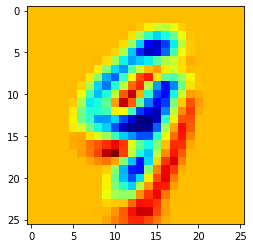

In [26]:
plt.imshow(net.cnn_model[0](images)[0, 0, :, :].detach().numpy(), cmap="jet")
plt.show()

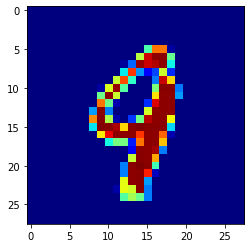

In [22]:
plt.imshow(net.cnn_model[1](images)[0, 0, :, :].detach().numpy(), cmap="jet")
plt.show()